<a href="https://colab.research.google.com/github/Rutuja-Shukla/Clustering-Geolocation-Data/blob/main/Clustering_Geolocation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Geolocation Data

Aim  : Visualize and understand geographical data in an interactive way with Python.

Description :

We have taxi rank locations, and want to define key clusters of these taxis,

where we can build service stations for all taxis operating in that region.

The dataset used in this project can be downloaded using the link given below

Dataset : https://drive.google.com/drive/folders/1952yD3woGpI0K4v_JPsmVAa-pi8FOmaZ?usp=sharing

# Import Libraries

In [ ]:
import re
# To upload the dataset
from google.colab import drive

# For storing and manipulating data.
import numpy as np
import pandas as pd
from collections import defaultdict

# For plots and charts visualization of the outcomes
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from ipywidgets import interactive

# For maps and co-ordinates visualization
import folium

# For function like various clustering techniques and silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

#For smart progress meter
from tqdm import tqdm

# need to upgrade numpy for hdbscan
!pip install numpy==1.16.0
# install this first before hdbscan
!pip install Cython
!pip install hdbscan
import hdbscan



## Create an array of colours to be used

In [ ]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

# Download Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/PROJECTS/Clustering_Geolocation_Data/Datasets/taxi_data.csv'
df = pd.read_csv(path1)
df

LON       LAT                          NAME
0    28.17858 -25.73882         11th Street Taxi Rank
1    28.17660 -25.73795    81 Bazaar Street Taxi Rank
2    27.83239 -26.53722          Adams Road Taxi Rank
3    28.12514 -26.26666  Alberton City Mall Taxi Rank
4    28.10144 -26.10567      Alexandra Main Taxi Rank
..        ...       ...                           ...
833  27.82999 -26.24445         Zola Clinic Taxi Rank
834  27.83991 -26.24235                Zola Taxi Rank
835  27.86166 -26.23624               Zondi Taxi Rank
836  28.39097 -26.30931            kwaThema Taxi Rank
837       NaN       NaN                           NaN

[838 rows x 3 columns]

# Data Analysis

In [ ]:
# Check for duplicates
df.duplicated(subset=['LON', 'LAT']).values.any()

True

In [ ]:
# Check for NAN values
df.isna().values.any()

True

In [ ]:
# Remaove NANs and Duplicates
print(f'Before dropping NANs and dupes\t:\tdf.shape = {df.shape}')
df.dropna(inplace = True)
df.drop_duplicates(subset=['LON', 'LAT'], keep = 'first', inplace = True)
print(f'After dropping NANs and dupes\t:\tdf.shape = {df.shape}')

Before dropping NANs and dupes	:	df.shape = (838, 3)
After dropping NANs and dupes	:	df.shape = (823, 3)


In [ ]:
# Information on Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 0 to 836
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LON     823 non-null    float64
 1   LAT     823 non-null    float64
 2   NAME    823 non-null    object 
dtypes: float64(2), object(1)
memory usage: 25.7+ KB


In [ ]:
# Create an numpy array of longitude and latitude
x = np.array(df[['LON','LAT']], dtype = 'float64')
x

array([[ 28.17858, -25.73882],
       [ 28.1766 , -25.73795],
       [ 27.83239, -26.53722],
       ...,
       [ 27.83991, -26.24235],
       [ 27.86166, -26.23624],
       [ 28.39097, -26.30931]])

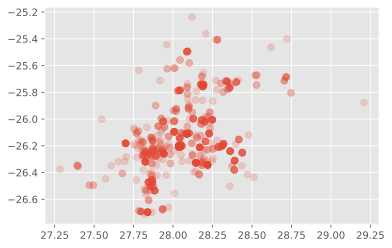

In [ ]:
# Visualze the array x
plt.scatter(x[: , 0], x[: , 1], alpha = 0.2, s = 50)

# Visualizing Geographical data

In [ ]:
m = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start = 9,
               tiles = 'Stamen Toner')
for _, row in df.iterrows():
    folium.CircleMarker(  location = [row.LAT, row.LON],
                          radius = 5,
                          popup = re.sub(r'[^a-zA-Z ]+', '', row.NAME),
                          color = '#1787FE',
                          fill = True,
                          fill_colour = '#1787FE'    
                          ).add_to(m)
m

# Analyzing Clustering Strength 

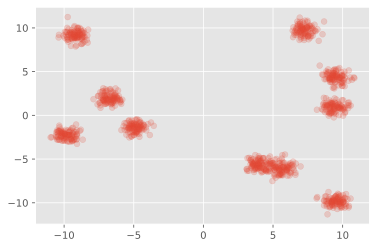

In [ ]:
# Generate isotropic Gaussian blobs for clustering and then plot them
x_blobs, _ = make_blobs(n_samples=1000, centers=10, n_features=2, 
                        cluster_std=0.5, random_state=4)
plt.scatter(x_blobs[:,0], x_blobs[:,1], alpha=0.2)

Number of Unique Clusters =  3
Silhouette Score =  0.6657220862867241


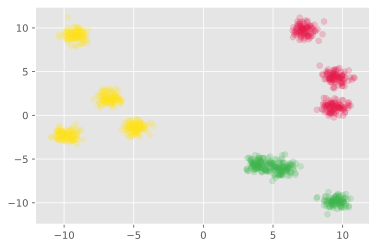

In [ ]:
# Grouping of clusters near to each other 
# Plot the groups with different colours
# A sample clustering algorithm - sample_clusters.npy

path2='/content/drive/MyDrive/PROJECTS/Clustering_Geolocation_Data/Datasets/sample_clusters.npy'
class_predictions = np.load(path2)

unique_clusters = np.unique(class_predictions)
print('Number of Unique Clusters = ', len(unique_clusters))
for unique_cluster in unique_clusters:
    x = x_blobs[class_predictions==unique_cluster]
    plt.scatter(x[:,0], x[:,1], alpha=0.2, c=cols[unique_cluster])

#The silhouette value is a measure of how similar an object 
#is to its own cluster compared to other clusters
print('Silhouette Score = ', silhouette_score(x_blobs, class_predictions))

Number of Unique Clusters =  10
Silhouette Score =  0.7473587799908298


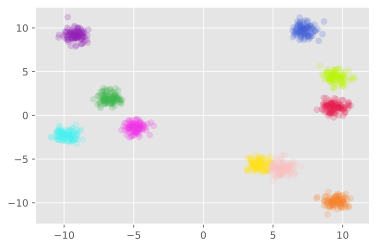

In [ ]:
# Improved grouping of clusters near to each other 
# Plot the groups with different colours
# A sample clustering algorithm - sample_clusters_improved.npy
path3 = '/content/drive/MyDrive/PROJECTS/Clustering_Geolocation_Data/Datasets/sample_clusters_improved.npy'
class_predictions = np.load(path3)
unique_clusters = np.unique(class_predictions)
print('Number of Unique Clusters = ', len(unique_clusters))

for unique_cluster in unique_clusters:
    x = x_blobs[class_predictions==unique_cluster]
    plt.scatter(x[:,0], x[:,1], alpha=0.2, c=cols[unique_cluster])
    
#The silhouette value is a measure of how similar an object 
#is to its own cluster compared to other clusters
print('Silhouette Score = ', silhouette_score(x_blobs, class_predictions))

# Various Clustoring Techniques for Geolocation Data

 # 1) K - Means Clustering

In [ ]:
# Create a Clustering Model using K-Means
x_blobs, _ = make_blobs(n_samples=1000, centers=50, 
                        n_features=2, cluster_std=1, random_state=4)
data = defaultdict(dict)
for x in range(1,21):
    model = KMeans(n_clusters=3, random_state=17, 
                   max_iter=x, n_init=1).fit(x_blobs)
    
    data[x]['class_predictions'] = model.predict(x_blobs)
    data[x]['centroids'] = model.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions)

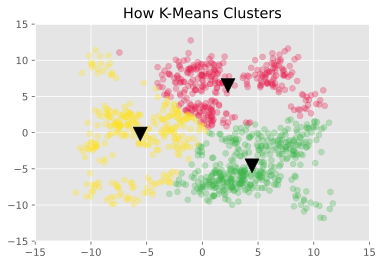

In [ ]:
# Plot K-Means Clusters
def f(x):
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']
    for unique_class in unique_classes:
            plt.scatter(x_blobs[class_predictions==unique_class][:,0], 
                        x_blobs[class_predictions==unique_class][:,1], 
                        alpha=0.3, c=cols[unique_class])
    plt.scatter(centroids[:,0], centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15]); plt.xlim([-15,15])
    plt.title('How K-Means Clusters')

interactive_plot = interactive(f, x=(1, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [ ]:
# Apply the K-Means Clustering model to our dataset
x = np.array(df[['LON', 'LAT']], dtype='float64')
k = 70
model = KMeans(n_clusters=k, random_state=17).fit(x)
class_predictions = model.predict(x)

# Add the result to 'df' dataframe
df[f'CLUSTER_kmeans{k}'] = class_predictions
df

LON       LAT                          NAME  CLUSTER_kmeans70
0    28.17858 -25.73882         11th Street Taxi Rank                15
1    28.17660 -25.73795    81 Bazaar Street Taxi Rank                15
2    27.83239 -26.53722          Adams Road Taxi Rank                 5
3    28.12514 -26.26666  Alberton City Mall Taxi Rank                33
4    28.10144 -26.10567      Alexandra Main Taxi Rank                18
..        ...       ...                           ...               ...
832  28.04441 -26.19727            Zimbabwe Taxi Rank                 7
833  27.82999 -26.24445         Zola Clinic Taxi Rank                 1
834  27.83991 -26.24235                Zola Taxi Rank                 1
835  27.86166 -26.23624               Zondi Taxi Rank                49
836  28.39097 -26.30931            kwaThema Taxi Rank                10

[823 rows x 4 columns]

In [ ]:
# Function to visualize the result of a clustering model on a map

def create_map(df, cluster_column):
    m = folium.Map(location=[df.LAT.mean(), df.LON.mean()],
                   zoom_start=9, tiles='Stamen Toner')

    for _, row in df.iterrows():

        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['LAT'], row['LON']],
            radius=5,
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)

    return m

# Create the resulting K-Means map 'm'
m = create_map(df, 'CLUSTER_kmeans70')

# Save the resulting K-Means map as html
m.save('kmeans_70.html')

# Visualize the resulting K-Means map 'm' and view Silhouette Score for k value
print(f'K={k}')
print(f'Silhouette Score: {silhouette_score(x, class_predictions)}')
m

K=70
Silhouette Score: 0.6367300948961482


In [ ]:
# To find the best silhouette score by varying the values of 'k'
best_silhouette, best_k = -1, 0

for k in tqdm(range(2, 100)):
    model = KMeans(n_clusters=k, random_state=1).fit(x)
    class_predictions = model.predict(x)
    
    curr_silhouette = silhouette_score(x, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette

print('\n')        
print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}')

100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



K=98
Silhouette Score: 0.6971995093340411


# 2) DBSCAN
### Density-Based Spatial Clustering of Applications with Noise

In [ ]:
# Train DBSCAN model
model = DBSCAN(eps=0.01, min_samples=5).fit(x)

# Predict the model
class_predictions = model.labels_

# Add the result of DBSCAN model to the 'df' dataframe
df['CLUSTERS_DBSCAN'] = class_predictions

# Create the resulting DBSCAN map 'm'
m = create_map(df, 'CLUSTERS_DBSCAN')

# Find number of clusters and outliers
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

# Find Silhouette Score ignoring outliers
print(f'Silhouette ignoring outliers: \
      {silhouette_score(x[class_predictions!=-1],\
       class_predictions[class_predictions!=-1])}')

# Find Silhouette Score not ignoring outliers and considering them as singletons
no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter,\
                        x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(x, no_outliers)}')

# Visualize the DBSCAN map
m

Number of clusters found: 51
Number of outliers found: 289
Silhouette ignoring outliers:       0.9232138250288208
Silhouette outliers as singletons: 0.5667489350583482


# 3) HDBSCAN
### Hierarchical DBSCAN

In [ ]:
#Train the HDBSCAN model
model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, 
                        cluster_selection_epsilon=0.01)

# Predict the model
class_predictions = model.fit_predict(x)

# Add the result of DBSCAN model to the 'df' dataframe
df['CLUSTER_HDBSCAN'] = class_predictions

# Create the resulting DBSCAN map 'm'
m = create_map(df, 'CLUSTER_HDBSCAN')

# Find number of clusters and outliers
print(f'Number of clusters found: ',len(np.unique(class_predictions))-1)
print(f'Number of outliers found: ',len(class_predictions[class_predictions==-1]))

# Find Silhouette Score ignoring outliers
print(f'Silhouette ignoring outliers: ',silhouette_score(x[class_predictions!=-1],\
                                        class_predictions[class_predictions!=-1]))

# Find Silhouette Score not ignoring outliers and considering them as singletons
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter,\
                        x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: ',silhouette_score(x, no_outliers))

# Visualize the HDBSCAN map
m

Number of clusters found:  66
Number of outliers found:  102
Silhouette ignoring outliers:  0.7670504356844786
Silhouette outliers as singletons:  0.638992483305273


## Addressing Outliers in HDBSCAN

In [ ]:
# Train the model
classifier = KNeighborsClassifier(n_neighbors=1)

# Split the data into train and test set
df_train = df[df.CLUSTER_HDBSCAN!=-1]
df_predict = df[df.CLUSTER_HDBSCAN==-1]

X_train = np.array(df_train[['LON', 'LAT']], dtype='float64')
y_train = np.array(df_train['CLUSTER_HDBSCAN'])

X_predict = np.array(df_predict[['LON', 'LAT']], dtype='float64')

# Fit the model
classifier.fit(X_train, y_train)

# Predict the model
predictions = classifier.predict(X_predict)

# Replace the new result with the previous result in 'df' dataframe
df['CLUSTER_hybrid'] = df['CLUSTER_HDBSCAN']
df.loc[df.CLUSTER_HDBSCAN==-1, 'CLUSTER_hybrid'] = predictions

# Create the resulting DBSCAN map 'm'
m = create_map(df, 'CLUSTER_hybrid')

# Save the model
m.save('hybrid.html')

# Find the number of clusters found and Silhouette score
print(f'Number of clusters found: {len(np.unique(df.CLUSTER_hybrid))}')
print(f'Silhouette Score: {silhouette_score(x, df.CLUSTER_hybrid)}')

# Visualize the HDBSCAN map
m


Number of clusters found: 66
Silhouette Score: 0.5849126494706486


Text(0.5, 0, 'Cluster Sizes')

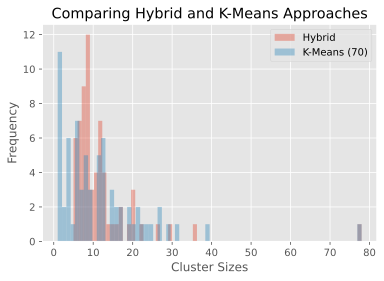

In [ ]:
# Visualize the result between Hybrid and K-Means Approaches
df['CLUSTER_hybrid'].value_counts().plot.hist(bins=70, alpha=0.4, 
                                              label='Hybrid')
df['CLUSTER_kmeans70'].value_counts().plot.hist(bins=70, alpha=0.4,
                                               label='K-Means (70)')
plt.legend()
plt.title('Comparing Hybrid and K-Means Approaches')
plt.xlabel('Cluster Sizes')

# Reference
https://www.coursera.org/projects/clustering-geolocation-data-intelligently-python